In [3]:
import argparse
import datetime
import random
import time
from pathlib import Path

import torch
import torchvision.transforms as standard_transforms
import numpy as np

from PIL import Image
import cv2
from support_functions import check_cross,study_zone
import os

from matplotlib import pyplot as plt
from shapely.geometry import Point as P
from shapely.geometry.polygon import LinearRing, Polygon
torch.cuda.empty_cache() 
import cv2
import json
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,GRU,SimpleRNN

In [4]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import LearningRateScheduler
import math

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,GRU,SimpleRNN
# import keras_nlp.layers.TransformerEncoder as TransformerEncoder

In [6]:
total=pd.read_excel("C:/Users/piyalong/detr/20230214_Analysis_.xlsx",sheet_name='Total')
total.head()

,Minutes,Miami,Unnamed: 2,Appa State,Unnamed: 4,Ole Miss,Unnamed: 6,Florida,Unnamed: 8,LSU,Unnamed: 10
0,-96,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-95,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-94,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-93,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-92,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
for game in ['Miami','Appa State','Ole Miss','Florida','LSU']:
    print(game,len(total[game].dropna()))

Miami 178
Appa State 180
Ole Miss 180
Florida 120
LSU 178


Text(0, 0.5, 'Total Exiting Traffic Count')

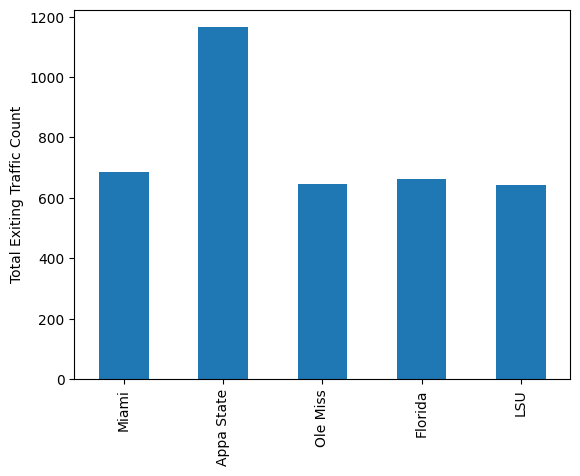

In [8]:
total[['Miami','Appa State','Ole Miss','Florida','LSU']].sum().plot.bar()
plt.ylabel('Total Exiting Traffic Count')


In [9]:
total['LSU']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
246   NaN
247   NaN
248   NaN
249   NaN
250   NaN
Name: LSU, Length: 251, dtype: float64

In [10]:
total['Minutes']

0      -96
1      -95
2      -94
3      -93
4      -92
      ... 
246    150
247    151
248    152
249    153
250    154
Name: Minutes, Length: 251, dtype: object

In [11]:
Florida=pd.read_excel("C:/Users/piyalong/detr/20230213_Analysis_.xlsx",sheet_name='Florida')
LSU=pd.read_excel("C:/Users/piyalong/detr/20230213_Analysis_.xlsx",sheet_name='LSU')
Ole_Miss=pd.read_excel("C:/Users/piyalong/detr/20230213_Analysis_.xlsx",sheet_name='Ole Miss')
Appa_State=pd.read_excel("C:/Users/piyalong/detr/20230213_Analysis_.xlsx",sheet_name='Appa State')
Miami=pd.read_excel("C:/Users/piyalong/detr/20230213_Analysis_.xlsx",sheet_name='Miami')


<AxesSubplot:>

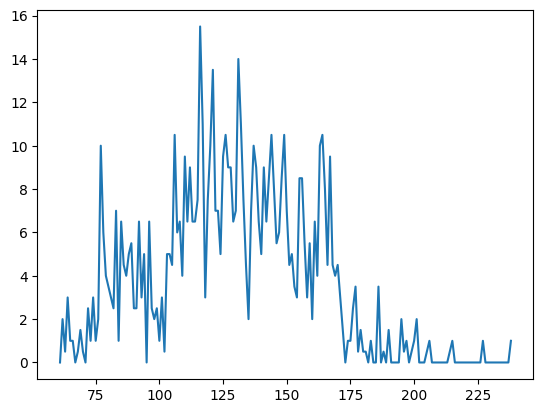

In [12]:
# df=LSU.set_index('checkzone4').sum(axis=1)
df=total['LSU']
df.plot(label="LSU")

In [13]:
df1 = total[['Minutes','LSU']].dropna()

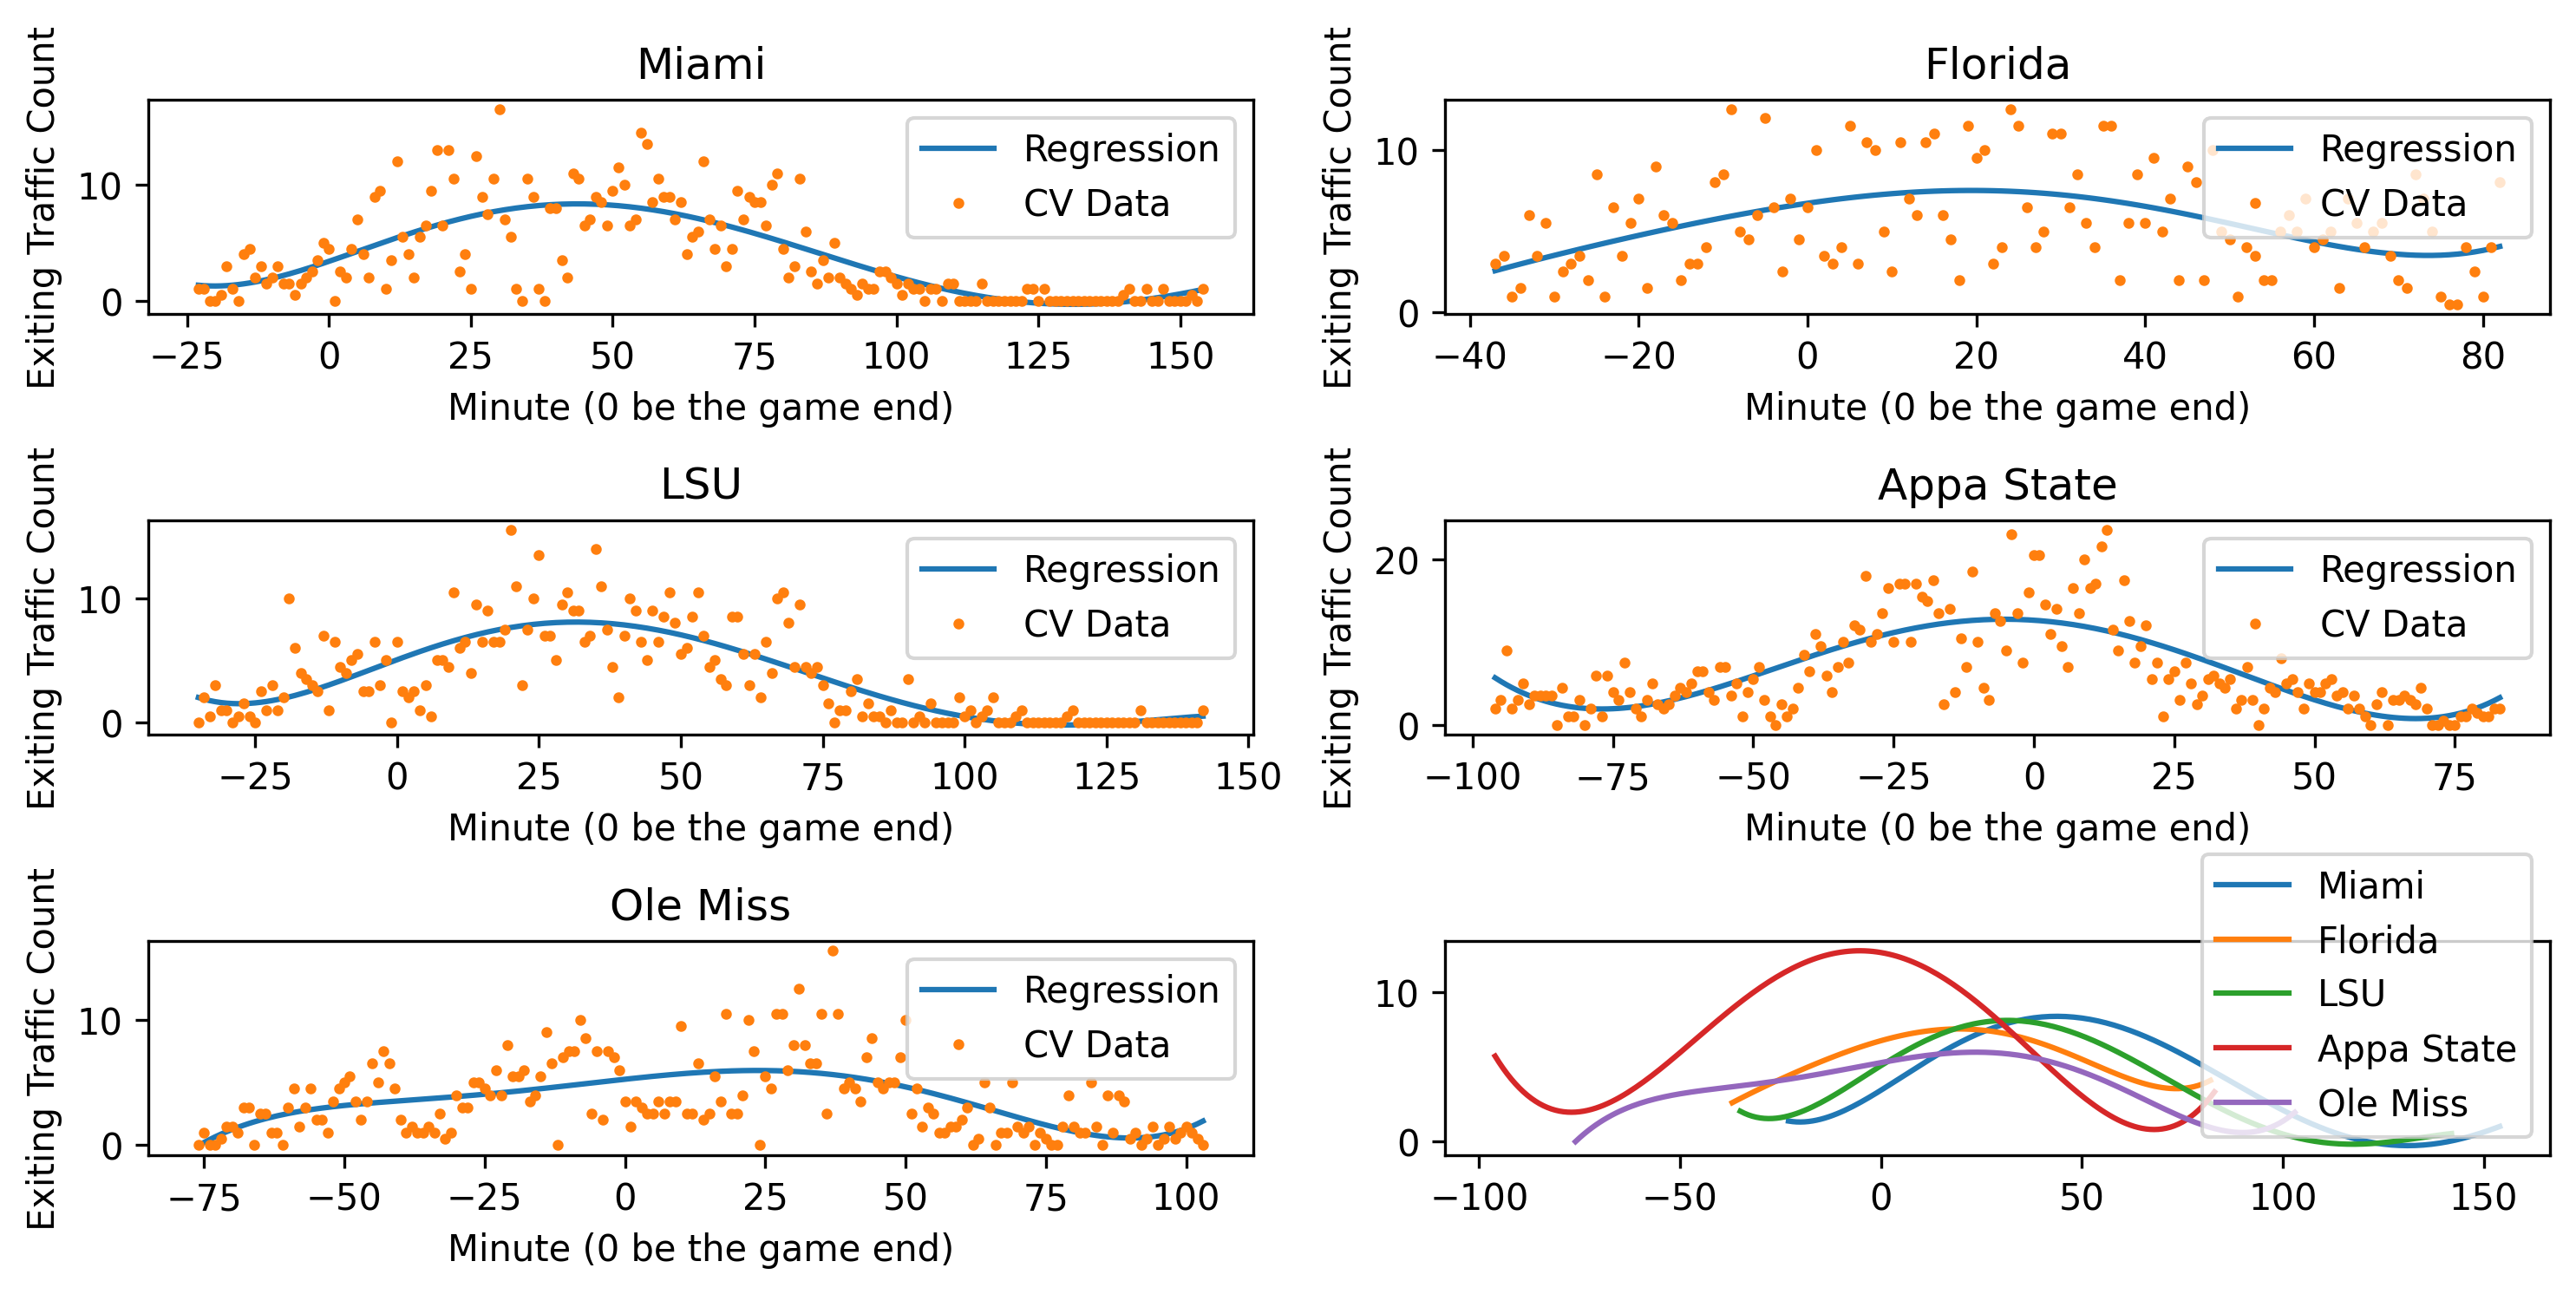

In [22]:
fig, axs = plt.subplots(3,2,figsize=(10,5),dpi=300)
axs = axs.flatten()

for i,game in enumerate(["Miami","Florida","LSU","Appa State","Ole Miss"]):
    df1 = total[['Minutes',game]].dropna()
    
    x = df1['Minutes']
    x[x =="Game End"] = 0
    x = df1['Minutes'].to_numpy().astype('float64')
    y=df1[game].to_numpy().astype('float64')

    fit = np.polyfit(x, y, 5)
    fit_fn = np.poly1d(fit)
    axs[i].plot(x, fit_fn(x), '-',label="Regression")
    axs[i].plot(x, y, 'o', ms=2, label="CV Data")
    axs[i].legend()
    axs[i].title.set_text('{}'.format(game))
    axs[i].set_xlabel('Minute (0 be the game end)')
    axs[i].set_ylabel('Exiting Traffic Count')
    axs[5].plot(x, fit_fn(x), '-',label=game)
plt.tight_layout()
plt.legend()
plt.show()

In [23]:
x

array([-76., -75., -74., -73., -72., -71., -70., -69., -68., -67., -66.,
       -65., -64., -63., -62., -61., -60., -59., -58., -57., -56., -55.,
       -54., -53., -52., -51., -50., -49., -48., -47., -46., -45., -44.,
       -43., -42., -41., -40., -39., -38., -37., -36., -35., -34., -33.,
       -32., -31., -30., -29., -28., -27., -26., -25., -24., -23., -22.,
       -21., -20., -19., -18., -17., -16., -15., -14., -13., -12., -11.,
       -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  7

In [ ]:
x = df1['Minutes'].to_numpy().astype('float64')
y=df1['LSU'].to_numpy().astype('float64')
x[x =="Game End"] = 0

fit = np.polyfit(x, y, 10)
fit_fn = np.poly1d(fit)
plt.plot(x, fit_fn(x), 'k-')
plt.plot(x, y, 'go', ms=3)

In [17]:
dataset =Florida.set_index('checkzone4').sum(axis=1).dropna()
scaler = MinMaxScaler()

dataset = scaler.fit_transform(np.array(dataset).reshape(-1, 1))

In [18]:
dataset.shape

(178, 1)

In [19]:
past = 25
future = 5
learning_rate = 0.1
batch_size = 1
epochs = 1000
look_back = 10
split_fraction = 0.80
train_split = int(split_fraction * int(dataset.shape[0]))

In [20]:
train_split

142

In [11]:
tf.keras.backend.clear_session()


In [12]:
train_data = dataset[0 : train_split - 1]
test_data = dataset[train_split-look_back:]
train_data.shape,test_data.shape

((141, 1), (46, 1))

In [13]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [14]:

trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

In [15]:
# df.values.reshape(-1,1)

In [16]:
trainX.shape,trainY.shape,testX.shape,testY.shape

((130, 10), (130,), (35, 10), (35,))

In [17]:
trainX.shape

(130, 10)

In [18]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [19]:
def step_decay(epoch):
    initial_lrate = learning_rate
    drop = 0.1
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    # print(lrate)
    return lrate

In [20]:
model =Sequential()
# model.add(SimpleRNN(10, batch_input_shape=(1,  1, look_back)))
model.add(GRU(10, batch_input_shape=(1,  1, look_back),return_sequences=True))
model.add(GRU(5))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

lrate = LearningRateScheduler(step_decay)

callback =[ 
            tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50),
           lrate
          ]



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [21]:

history=model.fit(trainX, trainY, 
                  validation_data=(testX, testY), 
                  epochs=epochs, 
                  batch_size=batch_size, 
                  verbose=0,
                  callbacks=callback
                 )

# model.load_weights('model.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
from sklearn.metrics import mean_squared_error
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


    
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5.63 RMSE
Test Score: 0.18 RMSE


Text(0, 0.5, 'Loss')

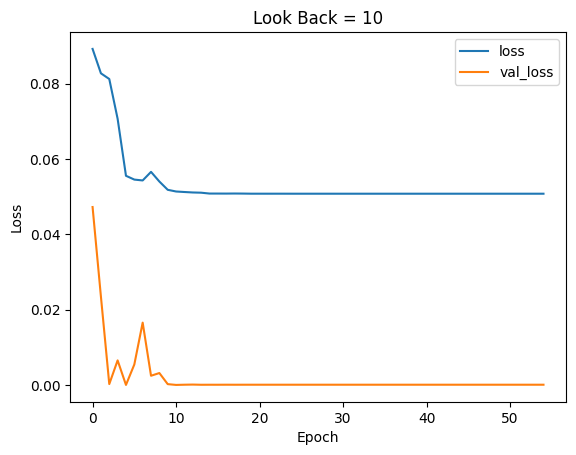

In [23]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.title('Look Back = {}'.format(look_back))
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Make Predictions in the future

In [24]:
np.array([testX[-1]]).shape

(1, 1, 10)

In [25]:
currentStep = np.array([testX[-1]])
for i in range(500):
    # future.append([currentStep[-1,:,:]])
    # print(i,currentStep[-5:])
    output = model.predict(currentStep[:,:,-look_back:]) #get the next step
    currentStep=np.append(currentStep,np.array([output]),axis=2)

futureY=scaler.inverse_transform(np.array([currentStep[0][0]]))

Text(0, 0.5, 'Exiting Traffic Count')

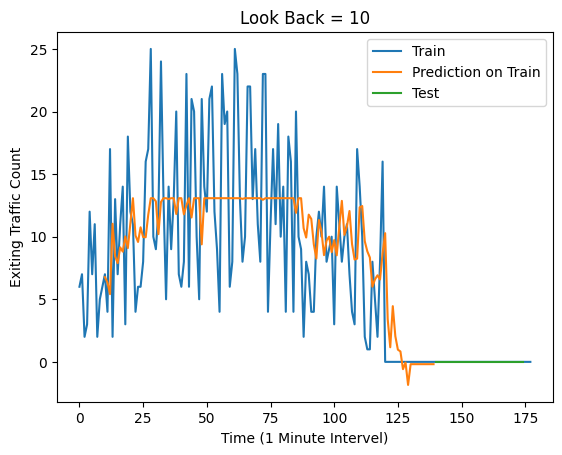

In [65]:
# shift train predictions for plotting
# trainPredictPlot = np.empty_like(dataset)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# # shift test predictions for plotting
# testPredictPlot = np.empty_like(dataset)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-2, :] = testPredict



# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label='Train')
plt.plot(np.arange(look_back,len(trainPredict)+look_back),trainPredict,label='Prediction on Train')
plt.plot(np.arange(len(trainX)+look_back,len(trainX)+len(testPredict)+look_back),testPredict,label='Test')
# plt.plot(np.arange(len(dataset),len(dataset)+len(futureY.T)),futureY.T,label='Future Prediction')


plt.legend()
plt.title('Look Back = {}'.format(look_back))
plt.xlabel('Time (1 Minute Intervel)')
plt.ylabel('Exiting Traffic Count')


In [27]:
np.arange(look_back,len(trainPredict)+look_back)

array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139])

In [28]:
futureY.T.shape

(510, 1)

In [29]:
np.arange(5,10)

array([5, 6, 7, 8, 9])

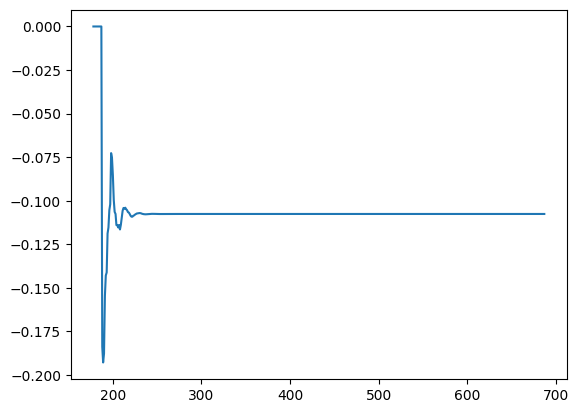

In [30]:
plt.plot(np.arange(len(dataset),len(dataset)+len(futureY.T)),futureY.T)

In [31]:
prediction =testPredict = model.predict(testX)


<AxesSubplot:>

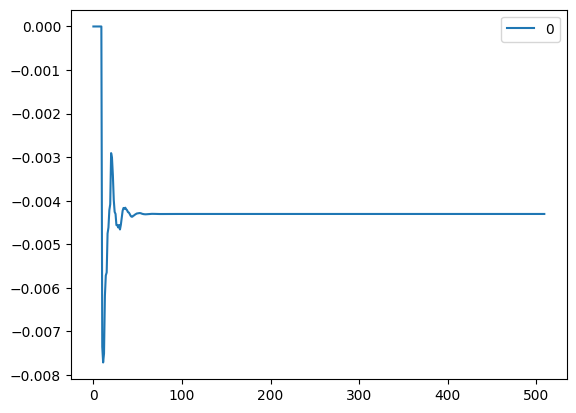

In [32]:
pd.DataFrame(currentStep[0][0]).plot()

In [33]:
testX[0].reshape(1,1,5).shape

ValueError: cannot reshape array of size 10 into shape (1,1,5)

In [ ]:
model.predict(testX[0].reshape(1,1,5))

In [ ]:
future